## 3. Aproksymacja metodą najmniejszych kwadratów

### 3.1. Definicja

[metody najmniejszych kwadratów]
Definicja 3.1. Niech $f \in L_{w}^{2}([a, b])$, czyli $f$ jest funkcja na przedziale $[a, b]$ w przestrzeni z norma

$$
\|f\|_{2, w}=\left(\int_{a}^{b}|f(x)|^{2} w(x) \mathrm{d} x\right)^{\frac{1}{2}}
$$

gdzie $w(x) \geqslant 0$ nazywamy wagą. Problem aproksymacji średniokwadratowej definiujemy jako znalezienie $\bar{a}^{*}=\left(a_{1}^{*}, \ldots, a_{n}^{*}\right)$, takie $\dot{z} e$

$$
\left\|f-\Phi\left(\cdot ; \bar{a}^{*}\right)\right\|_{2, w}=\min _{\bar{a}}\|f-\Phi(\cdot ; \bar{a})\|_{2, w},
$$

co można zapisać jako

$$
\int_{a}^{b}\left|f(x)-\sum_{k=1}^{n} a_{k}^{*} \phi_{k}(x)\right|^{2} w(x) \mathrm{d} x=\min _{\bar{a}} \int_{a}^{b}\left|f(x)-\sum_{k=1}^{n} a_{k} \phi_{k}(x)\right|^{2} w(x) \mathrm{d} x .
$$

### 3.2. Rozwiązanie

Warunek konieczny istnienia minimum przyjmuje postać

$$
\frac{\partial}{\partial a_{j}} \int_{a}^{b}\left|f(x)-\sum_{k=1}^{n} a_{k} \phi_{k}(x)\right|^{2} w(x) \mathrm{d} x=2 \sum_{k=1}^{n} \alpha_{k, j} a_{k}-2 \beta_{j}=0
$$

gdzie $\alpha_{k, j}=\left\langle\phi_{k}, \phi_{j}\right\rangle_{w}$ oraz $\beta_{j}=\left\langle f, \phi_{k}\right\rangle_{w}$, gdzie $\langle f, g\rangle_{w}$ to iloczyn skalarny zdefiniowany jako $\langle f, g\rangle_{w}=\int_{a}^{b} f(x) g(x) w(x) \mathrm{d} x$.

W postaci macierzowej powyższy układ równań przyjmuje postać

$$
\left[\begin{array}{ccc}
\alpha_{1,1} & \ldots & \alpha_{1, n} \\
\vdots & \ddots & \vdots \\
\alpha_{n, 1} & \ldots & \alpha_{n, n}
\end{array}\right]\left[\begin{array}{c}
a_{1} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
\beta_{1} \\
\vdots \\
\beta_{n}
\end{array}\right]
$$

Rozwiązując powyższy układ otrzymujemy optymalny wektor współczynników $\bar{a}^{*}=\bar{a}$.

In [1]:
import sys

sys.path.append("..")
import numpy as np
from src.approximations import (
    least_squares_approximation,
    approximating_function,
    orthonormal_legendre,
)
import matplotlib.pyplot as plt

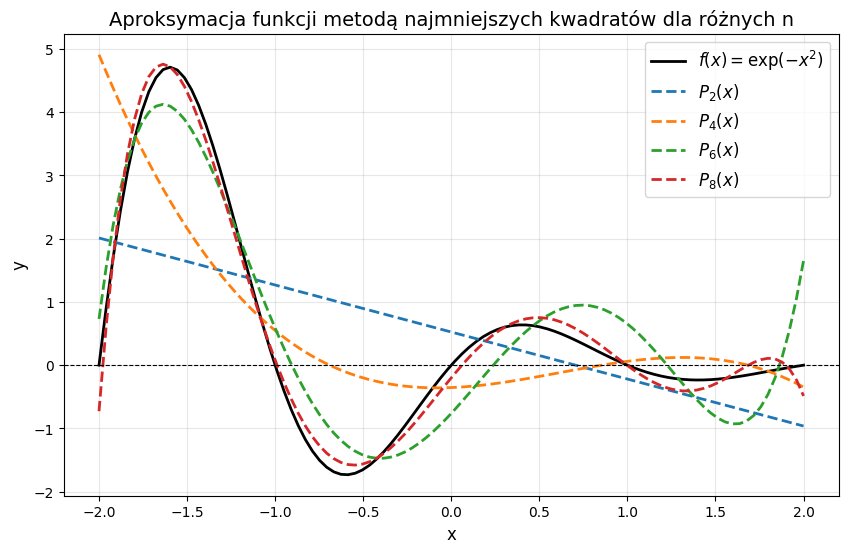

In [ ]:
def f(x):
    return np.sin(np.pi * x) * np.exp(-x)


a, b = -2, 2
n_values = [2, 4, 6, 8]

xs = np.linspace(a, b, 100)
ys = f(xs)

plt.figure(figsize=(10, 6))
plt.plot(xs, ys, label=r"$f(x) = \exp(-x^2)$", color="black", linewidth=2)

for n in n_values:
    a_coefficients = least_squares_approximation(f, a, b, n)
    pn = approximating_function(xs, a_coefficients)
    plt.plot(xs, pn, label=rf"$P_{{{n}}}(x)$", linestyle="--", linewidth=2)

plt.title(
    "Aproksymacja funkcji metodą najmniejszych kwadratów dla różnych n", fontsize=14
)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


### 3.3. Ortogonalizacja Grama-Schmidta

Niech dany będzie układ wektorów $\left.\left\{\phi_{1}(x), \ldots, \phi_{n}(x)\right)\right\}$. Wówczas proces ortogonalizacji Gramma-Schmidta przebiega następująco:

$$
\begin{aligned}
\psi_{1} & =\phi_{1} \\
\psi_{2} & =\phi_{2}-\frac{\left\langle\phi_{2}, \phi_{1}\right\rangle}{\left\langle\psi_{1}, \psi_{1}\right\rangle} \phi_{2} \\
\psi_{3} & =\phi_{3}-\frac{\left\langle\phi_{3}, \psi_{1}\right\rangle}{\left\langle\psi_{1}, \psi_{1}\right\rangle} \phi_{3}-\frac{\left\langle\phi_{3}, \psi_{2}\right\rangle}{\left\langle\psi_{2}, \psi_{2}\right\rangle} \phi_{3}, \\
& \vdots \\
\psi_{n} & =\phi_{n}-\sum_{k=1}^{n-1} \frac{\left\langle\phi_{n}, \psi_{k}\right\rangle}{\left\langle\psi_{k}, \psi_{k}\right\rangle} \phi_{n} .
\end{aligned}
$$

Otrzymany zbiór $\left\{\psi_{1}, \psi_{2}, \ldots, \psi_{n}\right\}$ jest zbiorem wektorów ortogonalnych.
Aby zbudować w ten sposób zbiór ortonormalny, każdy wektor należy podzielić przez jego normę:

$$
\psi_{k}=\frac{\psi_{k}}{\left\|\psi_{k}\right\|}
$$

dla $k=1,2, \ldots, n$.

### 3.4. W bazie ortonormalnej

Dla bazy ortonormalnej $\left\{\psi_{1}(x), \psi_{2}(x), \ldots, \psi_{n}(x)\right\}$

$$
\frac{\partial}{\partial a_{j}} \int_{a}^{b}\left|f(x)-\sum_{k=1}^{n} a_{k} \psi_{k}(x)\right|^{2} w(x) \mathrm{d} x=2 a_{j}-2 \beta_{j}=0 .
$$

W postaci macierzowej powyższy układ równań przyjmuje postać

$$
\left[\begin{array}{ccc}
1 & \ldots & 0 \\
\vdots & \ddots & \vdots \\
0 & \ldots & 1
\end{array}\right]\left[\begin{array}{c}
a_{1} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
\beta_{1} \\
\vdots \\
\beta_{n}
\end{array}\right]
$$

### 3.5. Wielomiany Legendre'a

Dla bazy wielomianów o współczynnikach rzeczywistych $\left\{1, x, x^{2}, \ldots\right\}$ iloczyn skalarny można zdefiniować jako

$$
\langle f, g\rangle=\int_{-1}^{1} f(x) g(x) \mathrm{d} x .
$$

Przeprowadzając proces ortogonalizacji Gramma-Schmidta dostaniemy wielomiany Legendre'a dane wzorem

$$
    P_n(x) = \frac{(2n-1)x P_{n-1}(x) - (n-1)P_{n-2}(x)}{n}  
$$

aby uzyskać baze ortonormalna przeprowadzamny dodatkowo normalizjacje
$$
    \bar{P}_n(x) = \frac{P_n(x)}{||P_n(x)||}
$$

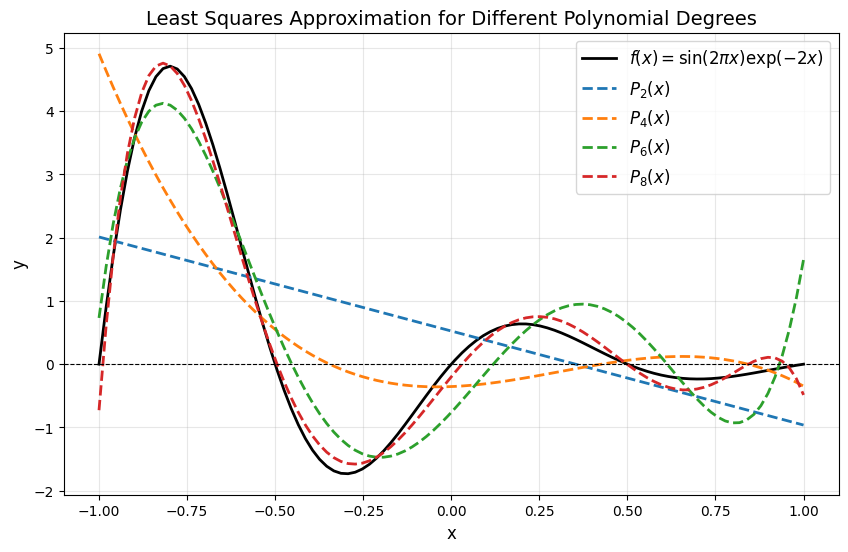

In [ ]:
# Define the target function
def target_function(x):
    return np.sin(2 * np.pi * x) * np.exp(-2 * x)


interval_start, interval_end = -1, 1
polynomial_degrees = [2, 4, 6, 8]

x_values = np.linspace(interval_start, interval_end, 100)
y_values = target_function(x_values)

plt.figure(figsize=(10, 6))
plt.plot(
    x_values,
    y_values,
    label=r"$f(x) = \sin(2\pi x) \exp(-2x)$",
    color="black",
    linewidth=2,
)

for degree in polynomial_degrees:
    coefficients = least_squares_approximation(
        target_function,
        interval_start,
        interval_end,
        degree,
        phi_k=orthonormal_legendre,
    )
    approximated_function = approximating_function(
        x_values, coefficients, phi_k=orthonormal_legendre
    )
    plt.plot(
        x_values,
        approximated_function,
        label=rf"$P_{{{degree}}}(x)$",
        linestyle="--",
        linewidth=2,
    )

plt.title("Least Squares Approximation for Different Polynomial Degrees", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

### 3.6. Aproksymacja dyskretna

Zakładamy, że wartości funkcji $f:[a, b] \rightarrow \mathbb{R}$ są znane na danym zbiorze $m$ punktów $a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b$. Określamy normę

$$
\|f\|_{w, p}=\left(\sum_{j=1}^{m}\left|f\left(x_{j}\right)\right|^{p} w_{j}\right)^{\frac{1}{p}}
$$

gdzie $w_{j} \geqslant 0$ dla $j=1, \ldots, m$ są wagami. Zadanie aproksymacji dyskretnej formułujemy w następujący sposób: Znaleźć $\bar{a}^{*}$ takie, że

$$
\left\|f-\Phi\left(\cdot ; \bar{a}^{*}\right)\right\|_{w, p}=\min _{\bar{a}}\left(\sum_{j=1}^{m}\left\|f\left(x_{j}\right)-\Phi\left(x_{j} ; \bar{a}\right)\right\|^{p} w_{j}\right)^{\frac{1}{p}}
$$


/home/olek/githubs/numerical_methods/notebooks/../src/approximations.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, a, b)


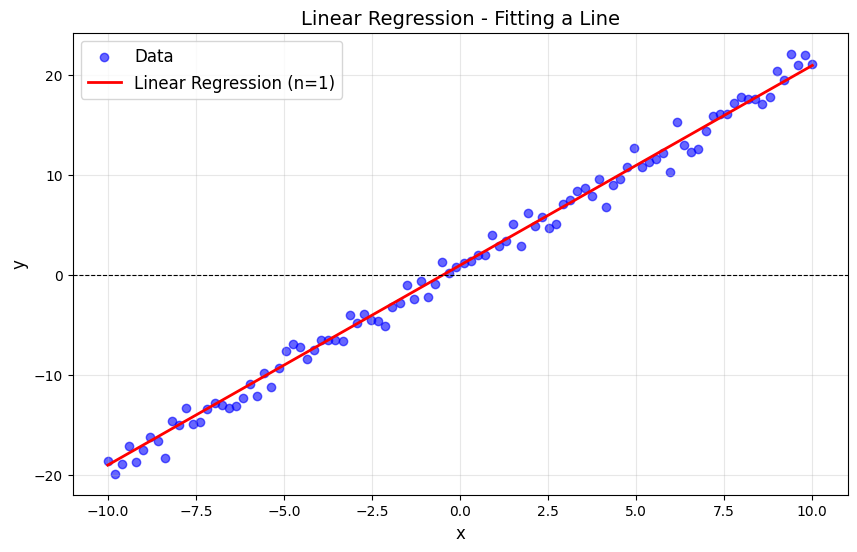

In [4]:
def f_lr(x):
    x = np.array(x)
    return 2 * x + 1 + np.random.normal(0, 1, x.shape)


a, b = -10, 10
xs = np.linspace(a, b, 100)
ys = f_lr(xs)

n_linear = 2
a_coefficients_linear = least_squares_approximation(f_lr, a, b, n_linear)
pn_linear = approximating_function(xs, a_coefficients_linear)

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, label="Data", color="blue", alpha=0.6)
plt.plot(xs, pn_linear, label="Linear Regression (n=1)", color="red", linewidth=2)
plt.title("Linear Regression - Fitting a Line", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()